In [1]:
%cd /content/
!rm -rf convnet2
# Clonamos el repositorio
!git clone https://github.com/alvaro-neira/convnet2.git 

/content
Cloning into 'convnet2'...
remote: Enumerating objects: 373, done.
remote: Counting objects: 100% (373/373), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 373 (delta 237), reused 218 (delta 107), pack-reused 0
Receiving objects: 100% (373/373), 216.14 KiB | 9.82 MiB/s, done.
Resolving deltas: 100% (237/237), done.


## Preparación de los datos

In [2]:
# Crear directorios para datos y snapshots
!mkdir -p /content/convnet2/snapshots
!mkdir -p /content/convnet2/logs
!mkdir -p /content/convnet2/data

!ls convnet2

configs   models	      ssearch.py	     train_siamese.py
data	  README.md	      ssearch_with_merge.py  train_simple.py
datasets  release_siamese.py  test_tfrecords.py      utils
logs	  snapshots	      train.py


In [3]:
# Descargar y descomprimir los datos
%cd /content/convnet2/data
!wget https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa -O data.zip
!unzip -q -o data.zip
!unzip -q -o train_images.zip
!unzip -q -o test_images.zip
!rm data.zip
!rm train_images.zip
!rm test_images.zip
!ls

/content/convnet2/data
--2021-11-14 01:30:08--  https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa [following]
--2021-11-14 01:30:08--  https://www.dropbox.com/sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0355d5846e8238f0b322122e0f.dl.dropboxusercontent.com/zip_download_get/A9UYyyY6Tpx-4DQCS3Jr250kuQCDkap8Y53DaS4hTk0gCEiEdUO-TyLM2xpBVin6NniFpgpoON5_9jVFCkQ-q0TbOL9j3nZZpCqgX79sPb65og# [following]
--2021-11-14 01:30:09--  https://uc0355d5846e8238f0b322122e0f.dl.dropboxusercontent.com/zip_download_get/A9UYyyY6Tpx-4DQCS3Jr250kuQCDkap8Y53DaS4hTk0gCEiEdUO-TyLM2xpBVi

## Predicciones

A continuación, veremos algunas predicciones de ejemplo utilizando los pesos aprendidos por este último modelo. Para esto, copiaremos el último checkpoint desde Google Drive a la sesión de Colab (si no se ha cerrado la sesión desde el entrenamiento, este paso no será necesario). Podemos acceder al contenido de nuestro Drive con el botón "Activar unidad de Drive" en el menú de la izquierda.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


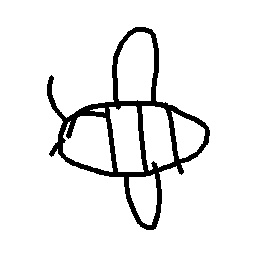

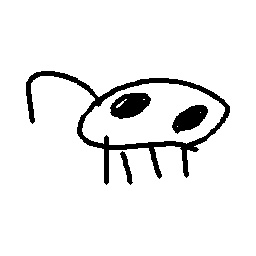

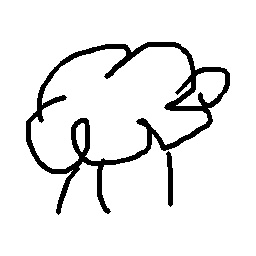

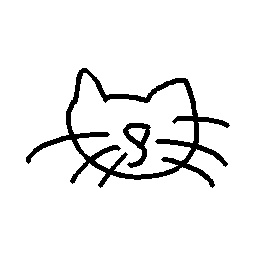

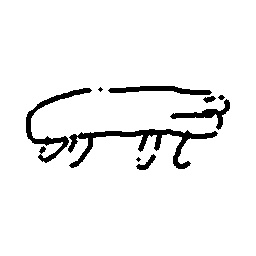

In [5]:
from IPython.display import Image, display

display(Image('/content/convnet2/data/test_images/bee/026_00119695.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/cow/081_00122082.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/sheep/258_00124921.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/cat/064_00122151.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/crocodile/084_00126855.jpg', width=100, height=100))

In [6]:
%cd /content/convnet2
!git fetch --all
!git checkout resnet34_prediction
!git pull origin resnet34_prediction
!cp /content/drive/MyDrive/tarea1/shape.dat /content/convnet2/data/shape.dat
!cp /content/drive/MyDrive/tarea1/mean.dat /content/convnet2/data/mean.dat
!python train_simple.py -mode predict -config configs/aneira_tfr.config -name SKETCH # no delay


/content/convnet2
Fetching origin
Branch 'resnet34_prediction' set up to track remote branch 'resnet34_prediction' from 'origin'.
Switched to a new branch 'resnet34_prediction'
From https://github.com/alvaro-neira/convnet2
 * branch            resnet34_prediction -> FETCH_HEAD
Already up to date.
2021-11-14 01:31:00.116628: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 clas

## Búsqueda por similitud



In [7]:
!mkdir -p /content/convnet2/data/sketch_folder
%cd /content/convnet2/data/sketch_folder

# Crear directorio para la búsqueda por similitud
!mkdir -p ssearch


/content/convnet2/data/sketch_folder


In [8]:
# Calculamos los feature vectors <1 minuto
%cd /content/convnet2/
!git fetch --all
!git checkout ssearch
!git pull origin ssearch
!cp data/shape.dat data/sketch_folder/shape.dat
!cp data/mean.dat data/sketch_folder/mean.dat
!cp /content/drive/MyDrive/tarea1/catalog.txt /content/convnet2/data/sketch_folder/ssearch/catalog.txt
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode compute

/content/convnet2
Fetching origin
Branch 'ssearch' set up to track remote branch 'ssearch' from 'origin'.
Switched to a new branch 'ssearch'
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch    -> FETCH_HEAD
Already up to date.
2021-11-14 01:31:59.355783: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple             

In [9]:
# Hacemos la búsqueda por similitud 
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode search

2021-11-14 01:33:21.925301: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple                  0 (unused)
                                                                 
Total params: 21,298,112
Trainable params: 21,282,880
Non-trainable params: 15,232
_________________________________________________________________
sim_model was loaded O

In [10]:
# Hacemos la búsqueda por similitud [1:91]
!git fetch --all
!git checkout metrics
!git pull origin metrics
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode search

Fetching origin
Branch 'metrics' set up to track remote branch 'metrics' from 'origin'.
Switched to a new branch 'metrics'
From https://github.com/alvaro-neira/convnet2
 * branch            metrics    -> FETCH_HEAD
Already up to date.
2021-11-14 01:34:46.575748: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple                  0 (unused)
  